# Simple Neural Network - Binary Classification
###### Neural network from scratch

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from local_utils import plot_decision_boundary, load_2D_dataset

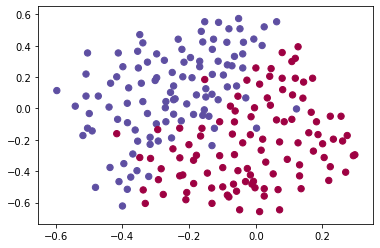

In [36]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [28]:
class nn_class():
    __PRINT_COST_INTERVAL = 1000
    
    def __init__(self, X, Y, hidden_layers, learning_rate, num_iterations, print_cost=False):
        np.random.seed(3)
        
        self.X = X
        self.Y = Y
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.print_cost = print_cost
        
        self.costs = []
        self.gradients = {}
        self.cache = { 'A0': X }
        self.parameters = {}        
        self.layers = [X.shape[0]] + hidden_layers + [1]
        self.L = len(self.layers)-1
        self.m = X.shape[1]
        
        for l in range(1, self.L+1):
            self.parameters['W' + str(l)] = np.random.randn(self.layers[l], self.layers[l-1]) / np.sqrt(self.layers[l-1])
            self.parameters['b' + str(l)] = np.zeros((self.layers[l], 1))

    # ########## model training functions: ##########
    def relu(self, Z):
        return np.maximum(Z, 0)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def relu_gradient(self, Z):
        return np.int64(np.where(Z > 0, 1, 0))

    def sigmoid_gradient(self, Z):
        return self.sigmoid(Z) * (1 - self.sigmoid(Z))
    
    def forward_prop(self):
        for l in range(1, self.L+1):
            Z = np.dot(self.parameters['W' + str(l)], self.cache['A' + str(l-1)]) + self.parameters['b' + str(l)]
            self.cache['Z' + str(l)] = np.copy(Z)

            if l == self.L:
                self.cache['A' + str(l)] = self.sigmoid(Z)
            else:
                self.cache['A' + str(l)] = self.relu(Z)
                
        Y_hat = self.cache['A' + str(self.L)]
        return Y_hat

    def back_prop(self):        
        for l in reversed(range(1, self.L+1)):
            if l == self.L:
                dZ = self.cache['A' + str(l)] - self.Y
                
                # alternatively, we can compute dZ for layer L the long way -- replace the previous line with:
                # self.gradients['dA' + str(l)] = -(np.divide(self.Y, self.cache['A' + str(l)]) - np.divide(1-self.Y, 1-self.cache['A' + str(l)]))
                # dZ = self.gradients['dA' + str(l)] * self.sigmoid_gradient(self.cache['Z' + str(l)]) 
            else:
                dZ = self.gradients['dA' + str(l)] * self.relu_gradient(self.cache['Z' + str(l)]) 

            self.gradients['dW' + str(l)] = 1.0/self.m * np.dot(dZ, self.cache['A' + str(l-1)].T)
            self.gradients['db' + str(l)] = 1.0/self.m * np.sum(dZ, axis=1, keepdims=True)
            self.gradients['dA' + str(l-1)] = np.dot(self.parameters['W' + str(l)].T, dZ)
            
    def update_parameters(self):
        for l in range(1, self.L+1):
            self.parameters['W' + str(l)] -= (self.learning_rate * self.gradients['dW' + str(l)])
            self.parameters['b' + str(l)] -= (self.learning_rate * self.gradients['db' + str(l)])

    def compute_cost(self, Y_hat):
        cost = -1/self.m * np.nansum( (self.Y*np.log(Y_hat)) + ((1-self.Y) * np.log(1-Y_hat)) )
        cost = np.squeeze(cost)
        return cost
    
    def train(self):
        """
        Trains the model after initialization.
        """
        self.costs = []
        
        for i in range(1, self.num_iterations+1):
            Y_hat = self.forward_prop()
            gradients = self.back_prop()

            if i % self.__PRINT_COST_INTERVAL == 0:
                cost = self.compute_cost(Y_hat)
                self.costs.append(cost)
                
                # we only want to print cost during training for debugging purposes:
                if self.print_cost:
                    print('cost at %s iteration: %s' % (i, cost))

            self.update_parameters()
    
    # ########## public functions: ##########
    def plot_cost(self):
        """ 
        Plots training costs.
        
        Used for debugging training algorithm and hyperparameters.
        """
        
        plt.plot(self.costs)
        plt.title('Cost per Iteration')
        plt.xlabel('Iteration (x%s)' % self.__PRINT_COST_INTERVAL)
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        """
        Predict (binary classify)
        """
        self.cache['A0'] = X
        self.m = X.shape[1]
        
        Y_hat = self.forward_prop()
        
        predictions = np.where(Y_hat > 0.5, 1, 0)
        return predictions
    
    def print_training_accuracy(self, X, Y):
        """
        Prints the accuracy of train/test sets.
        """
        predictions = self.predict(X)
        
        accuracy = np.mean(np.int8(predictions == Y))
        print('Accuracy: %s%%' % accuracy)
        

In [29]:
########## main: ##########
# hyper parameters:
train_hidden_layers = [20, 3]
train_learning_rate = 0.3
train_num_iterations = 70000

new_model = nn_class(train_X, train_Y, train_hidden_layers, train_learning_rate, train_num_iterations, print_cost=False)

In [30]:
new_model.train()

/home/deesus/.miniconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log
/home/deesus/.miniconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply


In [31]:
print('----- Training set: -----')
new_model.print_training_accuracy(train_X, train_Y)
print('----- Test set: -----')
new_model.print_training_accuracy(test_X, test_Y)

----- Training set: -----
Accuracy: 0.957345971563981%
----- Test set: -----
Accuracy: 0.915%


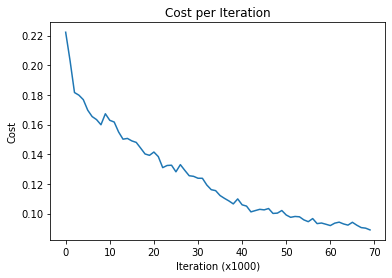

In [32]:
new_model.plot_cost()

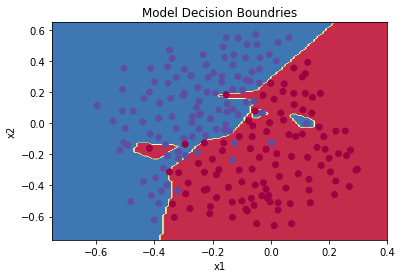

In [33]:
# plot decision boundry after training:
plt.title("Model Decision Boundries")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: new_model.predict(x.T), train_X, np.squeeze(train_Y))